## Regresión lineal: aproximaciones desde la estadística y el machine learning

Este notebook tiene como objetivo presentar al estudiante principios de la regresión lineal de modo que se puedan observar principios de aprendizaje de máquina (*machine learning*) en tareas supervisadas



Uno de los elementos claves de cualquier estrategia empresarial es movilizar los recursos hasta volverlos capacidades que permitan tener ventajas competitivas en el entorno de industria. Ejemplos de esas ventajas pueden ser un mejor precio (vía reducción de costos) o un producto de mayor calidad (vía diseño de producto/proceso).  Es por ello que la administración de operaciones es un medio clave para lograr ventajas competitivas, o como mínimo, mantener a la empresa en niveles competitivos dentro de la industria.

El caso de ejemplo implica conocer el desempeño de un producto bajo diversas condiciones de operación real. El producto es un rastreador de objetos cuya funcionalidad depende (en parte) de la red móvil. El fabricante tiene capacidad de intervención en dicha red móvil.

Lo que se desea predecir es la respuesta del dispositivo rastreador bajo un conjunto de condiciones reales que permitan generar estrategias para que dicha respuesta sea la ideal bajo múltiples condiciones del cliente (particularmente condiciones de conexión y tiempo de uso del producto), bien sea modificando el producto, el servicio, o la red móvil.

Veamos el archivo:

In [12]:
import pandas as pd
regtecnica = pd.read_csv("regtecnica.csv", sep=";", decimal=',')

In [13]:
regtecnica.shape

(99, 7)

In [14]:
display(regtecnica)

,potenciaresp,distancianodo,potencianodo,trafico,tiempo,picovalle,densidad
0,590.324,0.064,2.13,500,125,1,1.46
1,464.290,0.119,1.35,3020,312,1,5.27
2,728.850,0.005,1.66,2502,243,1,2.02
3,435.480,0.014,0.43,4444,70,1,6.08
4,464.455,0.043,1.21,3132,261,1,2.08
...,...,...,...,...,...,...,...
94,493.211,0.081,1.89,3568,151,1,9.45
95,255.123,0.136,0.25,4451,287,0,9.35
96,778.065,0.078,4.33,149,25,1,7.23
97,340.320,0.130,0.03,1562,119,0,9.27


La variable dependiente (o de respuesta) es la potencia de respuesta del dispositivo (potenciaresp). Las demás variables son posibles predictoras (variables independientes) e incluyen

1-la distancia al nodo de repetición más cercano (distancianodo)

2-La potencia del nodo de repetición más cercano (potencianodo)

3-El número de señales que el nodo procesa en ese momento (trafico)

4-El número de días desde que está en uso el dispositivo (tiempo)

5-Si es hora de alto tráfico (0) o bajo tráfico (1)- (picovalle)

6- La cantidad de nodos repetidores por kilómetro cuadrado (densidad)

## Aproximaciones al problema de predicción: estadística clásica vs. machine learning
Hay dos aproximaciones usuales a un problema de predicción: una aproximación estadística clásica y una aproximación de aprendizaje de máquina.

En la aproximación estadística clásica deben variarse las condiciones(valores) de las variables independientes de manera experimental para observar sus efectos en la variable de respuesta. Dichas variables independientes deben escogerse idealmente bajo un fundamento teórico. En esta aproximación, el cumplimiento de un conjunto de supuestos estadísticos es fundamental para demostrar la validez de la aproximación y su posible generalización a nuevos casos.
La capacidad explicativa del fenómeno es de alta relevancia, superior a la de su capacidad predictiva. Los resultados pueden interpretarse con total tranquilidad como resultados de causa y efecto si se ha realizado de manera experimental.

En la aproximación de machine learning con frecuencia la variación de los valores de las variables independientes no se han dado experimentalmente, sino en condiciones naturales del fenómeno. Dichas variables independientes se escogen ante todo dependiendo de su disponibilidad, por lo que podría haber factores/variables ocultas o intermedias. El cumplimiento/violación de los suspuestos estadísticos no invalida el modelo, sino que da pistas sobre posibles mejoramientos. La validación/generalización del modelo se da fundamentalmente por su capacidad predictiva en datos que no hacían parte de los que permitieron generar el modelo (separación de las bases de entrenamiento y validación). La capacidad predictiva tiene una mayor importancia que la explicativa.

###Bases de entrenamiento y validación
Al momento de generar bases de entrenamiento y validación, la primera y más básica aproximación es dividir la base de datos en dos: entrenamiento y validación. No existe un criterio único y definido para saber qué porcentaje de la base de datos debe entregarse a entrenamiento y cuál a validación. De manera empírica, con frecuencia se usa el 80% de los datos para la base de entrenamiento y el 20% de los datos para la base de validación.

In [15]:
potrespuesta=regtecnica["potenciaresp"]
predictores=regtecnica.iloc[:,1:]
display(predictores)

,distancianodo,potencianodo,trafico,tiempo,picovalle,densidad
0,0.064,2.13,500,125,1,1.46
1,0.119,1.35,3020,312,1,5.27
2,0.005,1.66,2502,243,1,2.02
3,0.014,0.43,4444,70,1,6.08
4,0.043,1.21,3132,261,1,2.08
...,...,...,...,...,...,...
94,0.081,1.89,3568,151,1,9.45
95,0.136,0.25,4451,287,0,9.35
96,0.078,4.33,149,25,1,7.23
97,0.130,0.03,1562,119,0,9.27


In [16]:
predictores.shape

(99, 6)

In [17]:
import sklearn
from sklearn.model_selection import train_test_split

predictores_train, predictores_test, potencia_train, potencia_test = train_test_split(predictores, potrespuesta, test_size=0.2, random_state=42)
#random state: se deja alguna semilla para que el muestreo sea replicable
#aquí se define el tamaño de la muestra, en este caso entrenamiento tendrá el 80% de los casos, pues test_size=0.2
regtecnica_train=pd.concat([potencia_train, predictores_train], axis=1)
regtecnica_test=pd.concat([potencia_test, predictores_test], axis=1)
display(regtecnica_train)

,potenciaresp,distancianodo,potencianodo,trafico,tiempo,picovalle,densidad
49,300.280,0.033,0.27,4992,253,0,3.38
70,581.709,0.133,2.89,4394,190,1,5.20
68,329.992,0.032,0.26,3073,114,0,1.46
15,613.040,0.059,2.97,1911,162,0,7.31
39,557.797,0.174,2.70,3233,115,1,1.15
...,...,...,...,...,...,...,...
60,438.214,0.173,1.85,824,142,0,2.15
71,796.738,0.059,4.34,3385,22,1,9.39
14,376.650,0.197,0.85,25,380,0,0.22
92,666.359,0.068,3.06,1397,63,0,6.11


## Aproximación estadística clásica
Vamos a crear dos modelos lineales clásicos. En ellos, las variables independientes se definen de antemano, es decir, son preespecificadas.

### entendimiento de datos
Primero vamos a observar la correlación entre los datos

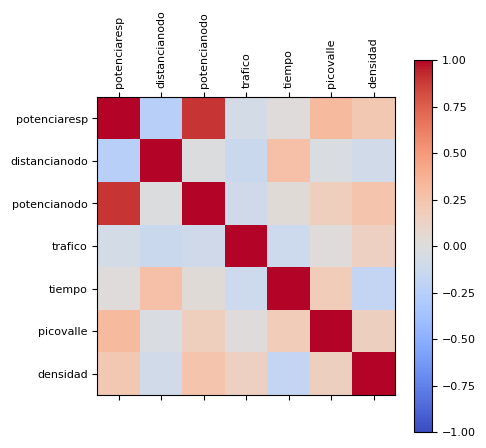

In [18]:
import matplotlib
import matplotlib.pyplot as plt
plt.matshow(regtecnica_train.corr(), cmap="coolwarm",vmin=-1, vmax=1)
##algunos arreglos gráficos
plt.xticks(range(regtecnica_train.select_dtypes(['number']).shape[1]), regtecnica_train.select_dtypes(['number']).columns, fontsize=8, rotation=90)
plt.yticks(range(regtecnica_train.select_dtypes(['number']).shape[1]), regtecnica_train.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
#plt.title('Matriz de Correlaciones', fontsize=16);
plt.show()

Se pueden observar algunas asociaciones con la variable dependiente. Así mismo debe buscarse que las variables independientes no tengan alta correlación entre sí (multicolinealidad) porque puede generar inestabilidad en el modelo (esto es, cambios bruscos en los coeficientes con la inclusión/exclusión de datos)
Para los modelos estadísticos clásicos, la capacidad explicativa puede verse reducida por la razón anterior, y por cambios de signo en los coeficientes que hacen los resultados no interpretables.


### Realización de modelos

Un posible primer modelo implica que la potencia del nodo más cercano y la hora pico/valle son posibles predictores.
un segundo modelo va a contener todas las variables que fueron recogidas, puesto que todas tenían algun tipo de sustento empírico y teórico.

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#CREANDO MODELOS BASICOS
#un modelo con variables elegidas (preespecificado)
modelo0=ols("potenciaresp~ potencianodo + picovalle",data=regtecnica_train)
#un modelo con todas las variables (preespecificado)
predictores_trainc=sm.add_constant(predictores_train)
modelo1=sm.OLS(potencia_train,predictores_trainc)

### Valoración de modelos
Una vez obtenidos los modelos se pasa a revisar sus métricas de ajuste (calidad) y el cumplimiento de supuestos.

In [20]:
resultado0 = modelo0.fit()
print(resultado0.summary())

                            OLS Regression Results                            
Dep. Variable:           potenciaresp   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.06e-29
Time:                        18:00:30   Log-Likelihood:                -448.46
No. Observations:                  79   AIC:                             902.9
Df Residuals:                      76   BIC:                             910.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      276.5585     17.674     15.648   

In [21]:
resultado1 = modelo1.fit()
print(resultado1.summary())

                            OLS Regression Results                            
Dep. Variable:           potenciaresp   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.66
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.52e-31
Time:                        18:00:30   Log-Likelihood:                -433.02
No. Observations:                  79   AIC:                             880.0
Df Residuals:                      72   BIC:                             896.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           354.9333     28.115     12.624

En este resumen, se observan las primeras y más básicas evaluaciones del modelo de regresión. Revisaremos dos pruebas de hipótesis y dos métricas de ajuste

Miremos primero la prueba de hipótesis F (*F statistics*). Se trata de una prueba básica en la que, si la regresión explica un poco más que el error (el modelo explica más que el azar), el valor p será pequeño. A menos que las variables independientes tengan muy baja asociación con la dependiente, esta prueba se verificará y nos dirá que el modelo tiene un mínimo nivel de validez predictiva.

Más interesantes son las pruebas de hipótesis t individuales para cada variable independiente (*Pr>|t|*), en las que se prueba si cada coeficiente es o no diferente de cero, lo que da una idea de si la inclusión de cada una de las variables valió la pena en el modelo (el asunto es un poco más complejo porque las interacciones y el tipo de relación cuentan: ver *feature selection* y *feature engineering* más adelante).

En nuestro primer modelo ambas variables tienen coeficientes significativos, pero en el modelo con todas las variables, tres de ellas (tráfico, tiempo y densidad) no tienen un valor p que permita rechazar la idea de que sus coeficientes sean cero (en palabras llanas, esas variables no parecen aportar o ser importantes para explicar/predecir la variable dependiente). También podemos ver los intervalos de confianza para los coeficientes

In [22]:
import math
print("R2 ajustado: modelo0:",resultado0.rsquared_adj,"; modelo 1:",resultado1.rsquared_adj)
print("Errores residuales: modelo0:",math.sqrt(resultado0.mse_resid),"; modelo 1:",math.sqrt(resultado1.mse_resid))

R2 ajustado: modelo0: 0.8226738166891503 ; modelo 1: 0.8733669747211488
Errores residuales: modelo0: 72.02885343484041 ; modelo 1: 60.868634562992696


Las dos metricas que se presentan son: el r^2^ (ajustado) y el error estándar promedio de los residuales (error residual).
El r^2^ nos indica el porcentaje de la variabilidad de la variable dependiente (la respuesta del dispositivo) que las variables dependientes logran explicar. Dado que se trata de un modelo que incluye múltiples variables independientes, es indispensable utilizar como medio de comparación el r^2^ ajustado(*Adjusted R-squared*), el cual es un primer intento por penalizar el sobreajuste u *overfitting* (más sobre esto en la sección de *overfitting*). Nuestro modelo de dos variables explica el 82.3% de la variabilidad, mientras que el modelo con todas las variables cubre el 87.34% de la variabilidad.

El error residual nos dice a cuánto asciende, en promedio, la variabilidad que no se ha logrado explicar, en dimensiones de la variable dependiente. En ese sentido, es muy útil para valorar desde el negocio y la operación si el modelo es viable. Nuestros modelos básico y completo tienen errores residuales de 72.02 y 60.86 milivatios, esto es, cuando hagamos una predicción para un caso nuevo podemos esperar un error de este tamaño en la predicción. Que este error sea aceptable/manejable o no depende del contexto del negocio. En Operaciones y finanzas estos valores pueden ayudar a calcular márgenes de contingencia o tolerancia que mejoren la planeación y permitan estar preparados para asumir o absorber estos errores. La regla clásica (si se cumplen los supuestos, particularmente el de normalidad de variables) es planear una contingencia de dos veces este error hacia arriba o hacia abajo para cubrir el 95% de los riesgos de error.

Resumiendo la comparación, el modelo completo tiene mejores métricas que el modelo básico, pero algunos de sus coeficientes no son significativos, lo que lleva a sospechar que incluir todas las variables no es lo adecuado. Adicionalmente, ambas métricas presentadas tienen riesgo de estar infladas para el modelo completo debido al *overfitting*.

### Cumplimiento de supuestos

Para revisar el cumplimiento de supuestos, es importante recordar cuáles son los supuestos básicos:
a) Los residuales se distribuyen normalmente con media cero
b) la varianza de los residuales es constante (*homocedasticidad*)
c) los residuos no están correlacionados

Estos supuestos son buenos indicios (pero no pruebas definitivas) de que los residuos son *ruido blanco* , es decir, no hay ningún patrón residual en ellos que nos permita mejorar la explicación que hemos logrado con nuestro modelo actual.

Primero, revisemos la normalidad de los residuos con las pruebas que se presentan en el resumen.
Las asimetrías y kurtosis están muy lejanas de cero. la prueba de Jarque -bera tiene como hipótesis nula la normalidad, y en ambos casos se rechaza, lo que nos da fuertes indicios de no cumplimiento de supuestos, particularmente el de la normalidad.
También podemos hacer un gráfico para ello, el q-q plot, que compara una distribución teórica (en este caso la normal) con lo encontrado en los residuales.
El gráfico Q-Q  compara la distribución de los residuales contra la curva normal. En la medida en que los cuantiles teóricos no se corresponden con los valores de los residuos encontrados (no se ven los puntos en diagonal) , particularmente cuando hablamos de residuos positivos altos (parte derecha/arriba de la gráfica) entonces muy probablemente nuestro modelo no cumpla el supuesto de normalidad.

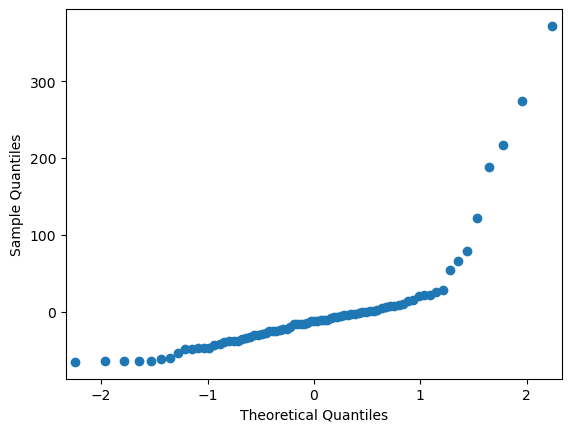

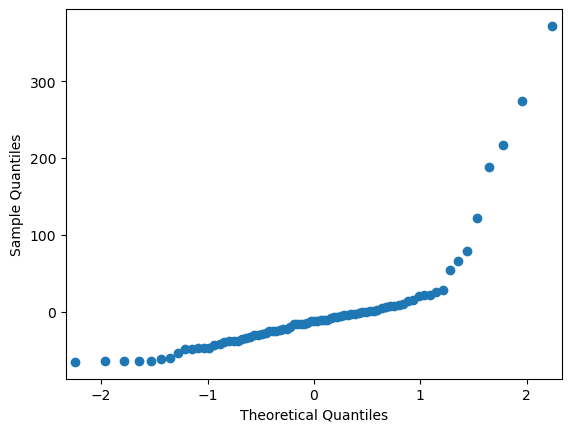

In [23]:
sm.qqplot(resultado0.resid)

Posteriormente son importantes otros dos gráficos:
El gráfico de predicciones contra residuos y el gráfico de influencia

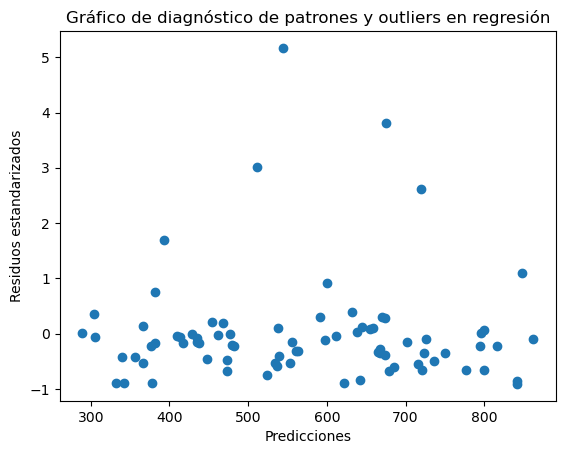

In [24]:
plt.scatter(resultado0.fittedvalues,resultado0.resid_pearson)
plt.title("Gráfico de diagnóstico de patrones y outliers en regresión")
plt.xlabel('Predicciones')
plt.ylabel('Residuos estandarizados')
plt.show()

El primer gráfico muestra las predicciones en el eje x contra los residuos en el eje Y. El objetivo es detectar atípicos y algún tipo de patrón visible. El gráfico muestra los valores que se podrían considerar atípicos  por estar encima o debajo de 2 o 3 desviaciones estándar, de los cuales hay varios en este caso, especialmente en la parte alta.Los patrones si deben ser observados por el analista. Un patrón clásico es la forma de embudo, que implica bajos errores en predicciones bajas y altos errores en predicciones altas, un signo claro de que la variabilidad no es constante y estamos en presencia de *no homocedasticidad*. Los gráficos presentados no parecen tener algun patrón adicional.


El segundo gráfico chequea la presencia de puntos de influencia, casos que cambian significativamente el resultado de la regresión. Valores más allá de la curva roja (largas distancias de Cook) serán puntos de influencia que invitan a obtener más casos de combinaciones cercanas de variables dependientes para saber si el modelo actual es válido como está o simplemente se ve influenciado y dominado por esos puntos en regiones "escasas" de puntos. Lo que nos muestra el gráfico, de nuevo, es que tenemos outliers (y nos pone el número de línea de aquellos que considera importantes) pero no parece haber puntos especialmente influyentes en leverage, es decir, que cambian fuertemente los coeficientes si se incluyen o retiran.

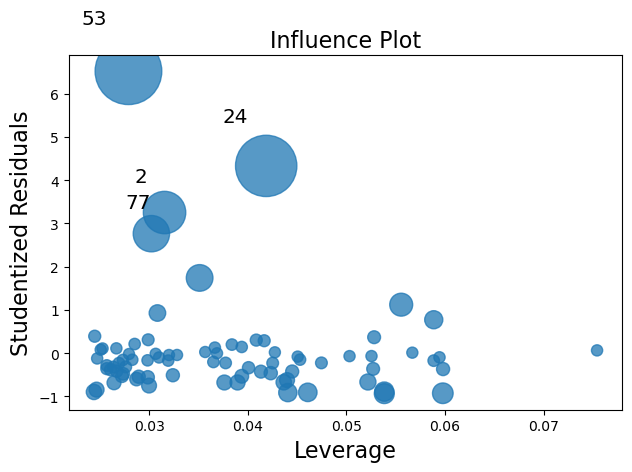

In [25]:
fig = sm.graphics.influence_plot(resultado0, criterion="cooks")
fig.tight_layout(pad=1.0)

Por último, chequeemos la autocorrelación de residuos con ayuda de la prueba de durbin-watson. Esta prueba de hipótesis prueba la autocorrelación de los datos con su dato inmediatamente anterior. Rechazar la hipótesis nula implica una sospecha de autocorrelación en los residuos, esto es, el orden en que se presentan los datos permite explicar parcialmente patrones en los residuos. Esto se presenta con frecuencia en datos en los que el factor tiempo u orden de recolección de los datos tiene algun efecto, (!o cuando la base de datos ha sido ordenada artificialmente también puede ocurrir!)
En nuestro caso los valores de Durbin Watson para ambos modelos son superiores a 1.8, lo que es una regla práctica que permite que descartemos autocorrelación de residuos.

In [26]:
print(resultado0.summary())

                            OLS Regression Results                            
Dep. Variable:           potenciaresp   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.06e-29
Time:                        18:00:30   Log-Likelihood:                -448.46
No. Observations:                  79   AIC:                             902.9
Df Residuals:                      76   BIC:                             910.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      276.5585     17.674     15.648   

In [27]:
print(resultado1.summary())

                            OLS Regression Results                            
Dep. Variable:           potenciaresp   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.66
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.52e-31
Time:                        18:00:30   Log-Likelihood:                -433.02
No. Observations:                  79   AIC:                             880.0
Df Residuals:                      72   BIC:                             896.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           354.9333     28.115     12.624

En resumen, nuestro modelo básico presenta valores atípicos, particularmente residuos positivos altos en los que nuestra predicción está muy por debajo del valor real, lo que conlleva también a la violación del supuesto de normalidad. Si se obtienen los diagnósticos de supuestos para el modelo completo, la situación es altamente similar.  

###Conclusión
Desde un punto de vista estadístico clásico tanto el modelo básico como el modelo completo (parte de cuyos coeficientes además no son significativos) deben ser revisados y no son explicativos del fenómeno, aunque sus ajustes son relativamente buenos. El modelo está incompleto y deben recogerse nuevos datos y trabajar más profundamente en la teoría.


## A proximación de aprendizaje de máquina (machine learning)

Desde esta aproximación, lo que se busca es sacar el mejor provecho posible a los datos existentes (aprender de ellos) de modo que la capacidad predictiva sea máxima, aunque la explicabilidad teórica y la robustez estadística de los resultados como modelo del mundo no sean las ideales.

## Feature selection & overfitting

Si contamos con un conjunto específico de variables, ¿cómo seleccionar aquellas que puedan darnos el mejor poder predictivo/explicativo?. El proceso para responder a esta pregunta se conoce como *feature selection* o selección de variables.

El objetivo (múltiple) de la selección de variables es obtener el mínimo número de variables que me den la máxima capacidad de predicción generalizada a datos nuevos o frescos. En palabras de Einstein, un modelo debe ser "tan simple como sea posible, pero no simplista"

Una razón fundamental para tratar de reducir el número de variables es eminentemente práctica: menos variables implican a) menos gasto en la recolección adecuada y precisa de datos, b) menos gasto computacional y por tanto, mayor velocidad de implementación y c)mayor capacidad de realizar explicaciones teóricas.

Una segunda razón poderosa para ajustar el número de variables es el riesgo de ocurrencia de un fenómeno denominado sobreajuste u *overfitting*.

*Overfitting* es ,literalmente, aprender para el examen (base de entrenamiento) sin aprender para la vida (los datos frescos).

Siendo más precisos, mientras más parámetros se incluyan en un modelo, más probable es que el modelo se ajuste perfectamente a los datos desde los que aprendí y pierda capacidad de generalizar en datos nuevos.

En el caso de la regresión, cualquier variable que se incluya como posible predictora (independiente) va a generar un aumento en el r^2^. De ese modo, si tenemos *n* casos y usamos como variable predictora un polinomio de grado *n+1* podemos ajustar la predicción perfectamente (r^2^=1) a los datos de los que se está aprendiendo.
Es por eso que el r^2^ no es una métrica adecuada cuando se usa la aproximación de machine learning en una regresión. Una primera mejora es el uso del r^2^ ajustado, el cual penaliza la métrica por el número de parámetros (variables) que se utilizaron.

Una mejor opción es la utilización del criterio de información de Aikake (AIC), el cual también penaliza por el número de parámetros de una manera más formal, basado en la teoria de la información. Mientras menor sea el valor del AIC, mejor es el modelo en comparación relativa con los otros modelos candidatos.
Veamos como funciona eso en los modelos que ya hemos creado.

In [28]:
print("AIC modelo1: ",resultado0.aic, "-AIC modelo 2: ", resultado1.aic)

AIC modelo1:  902.9103931648302 -AIC modelo 2:  880.0399769208507


Así comparados, nuestro modelo completo es mejor que el modelo con sólo dos variables (reducido)

Sin embargo, el mecanismo más utilizado par evaluar la capacidad predictiva de un modelo es el uso de una métrica de predicción en datos frescos, como explicamos al principio. Es por eso que separamos dos bases: una de entrenamiento y otra de validación.

Ahora vamos a hacer predicciones basadas en cada uno de nuestros modelos, y compararlas a partir de la raíz cuadrática media del error (RMSE)

In [29]:
# para el primer modelo
predicciones0=resultado0.predict(regtecnica_test)

#para el segundo modelo
predictores_testc=sm.add_constant(predictores_test)
predicciones=resultado1.predict(predictores_testc)

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse0 = np.sqrt(mean_squared_error(potencia_test, predicciones0))
rmse1 = np.sqrt(mean_squared_error(potencia_test, predicciones))
print(rmse0, rmse1)

47.34383261995048 48.64334049117005


Bajo esta métrica, nuestro modelo básico está obteniendo ligeramente peores predicciones que el modelo completo (una ganancia  de menos de un milivatio en el error).

Pero, ¿será que nuestro modelo básico sufre de un pobre ajuste, y es posible conseguir un modelo que tenga aún mejores predicciones que el modelo completo sin utilizar todas las variables independientes?

Para saber eso, es necesario utilizar métodos de selección de variables en regresión.

##feature selection en regresión

Hay por lo menos tres métodos de selección de variables en regresión:

a) Pasos sucesivos (*stepwise*)

b) Mejores subconjuntos (*best subsets*): Dado un número de variables máximo *n*, la técnica de mejores subconjuntos busca todos los subconjuntos de tamaño *k* donde k<=n. Este método no trabaja secuencialmente, sino que hace todos los modelos posibles para cada tamaño n. Es un método de *fuerza bruta*


c) Uso de componentes principales. Esto ayuda a reducir el número de variables.

### stepwise

Este método se basa en la idea de ir eligiendo **secuencialmente** las variables que deben incluirse o retirarse del modelo de acuerdo a un criterio. En el caso de R, el criterio es efectivamente la reducción en AIC. Se busca primero la variable que reduzca más el AIC frente a un modelo sin predictores; una vez incluida, se evalúa si la inclusión/exclusión de alguna variable adicional reduce el AIC, y de ser así, se incluye. El proceso se detiene cuando ninguna inclusión/exclusión de variables disminuye el AIC.

Lastimosamente las opciones en python para realizar este proceso son limitadas. Por ello es necesario implementar una función que lo haga:

In [31]:
##tomado de:https://planspace.org/20150423-forward_selection_with_statsmodels/
##con una ligera modificación en la métrica para ajustarlo a AIC
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Modelo lineal con selección hacia adelante

    Parametros:
    -----------
    data : pandas DataFrame con todos los predictores y la variable de respuesta

    response: string, nombre de la variable de respuesta en los datos

    Retorna:
    --------
    model: un "optimo" modelo lineal ajustado de statsmodels
           con intercepto
           seleccionado hacia adelante
           evaluado mediante AIC
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 1000000.0, 1000000.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [32]:
ver1=smf.ols("potenciaresp~ potencianodo",data=regtecnica_train).fit().aic
ver2=smf.ols("potenciaresp~ potencianodo + picovalle",data=regtecnica_train).fit().aic
ver3=smf.ols("potenciaresp~ potencianodo + distancianodo",data=regtecnica_train).fit().aic
ver4=smf.ols("potenciaresp~ potencianodo + picovalle + distancianodo",data=regtecnica_train).fit().aic
ver5=smf.ols("potenciaresp~ potencianodo + picovalle + distancianodo + tiempo",data=regtecnica_train).fit().aic
print(ver1, ver2, ver3,ver4,ver5)

913.4188979626358 902.9103931648302 890.034432131263 875.4879113821299 877.1665913808831


In [33]:
resultado2=forward_selected(regtecnica_train,"potenciaresp")

In [34]:
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:           potenciaresp   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.44e-34
Time:                        18:00:30   Log-Likelihood:                -433.74
No. Observations:                  79   AIC:                             875.5
Df Residuals:                      75   BIC:                             885.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       343.9711     18.772     18.324

Como puede observarse, el modelo final de AIC mínimo incluye 3 variables: la hora pico/valle, la distancia al nodo y la potencia del nodo, con unos resultados mejores que los modelos anteriores en el r^2^.

Miremos los supuestos del modelo:

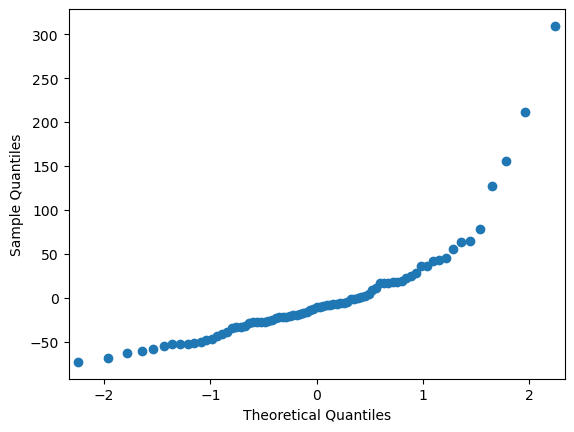

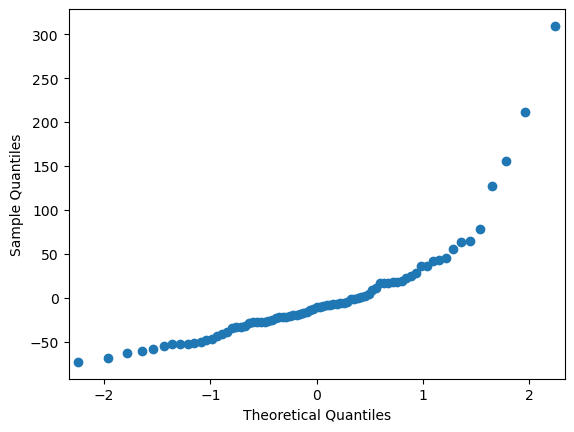

In [35]:
sm.qqplot(resultado2.resid)

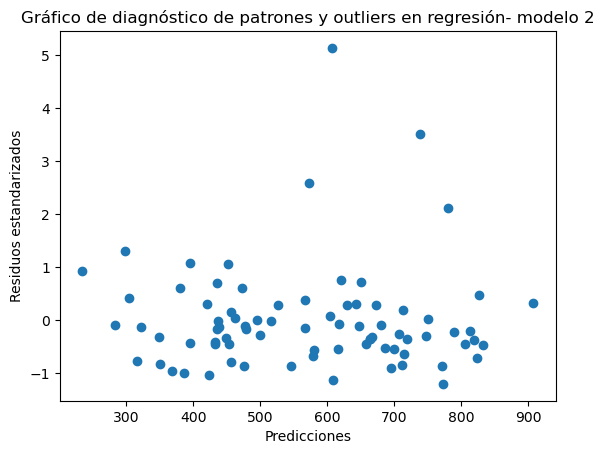

In [36]:
plt.scatter(resultado2.fittedvalues,resultado2.resid_pearson)
plt.title("Gráfico de diagnóstico de patrones y outliers en regresión- modelo 2")
plt.xlabel('Predicciones')
plt.ylabel('Residuos estandarizados')
plt.show()

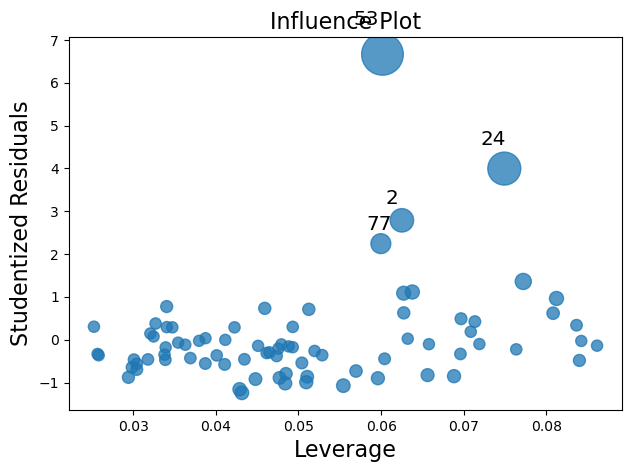

In [37]:
fig2 = sm.graphics.influence_plot(resultado2, criterion="cooks", size=30)
fig2.tight_layout(pad=1.0)

In [38]:
print("R2 ajustado: modelo1:",resultado1.rsquared_adj,"; modelo 2:",resultado2.rsquared_adj)
print("Errores residuales: modelo1:",math.sqrt(resultado1.mse_resid),"; modelo 2:",math.sqrt(resultado2.mse_resid))

R2 ajustado: modelo1: 0.8733669747211488 ; modelo 2: 0.8761836240863088
Errores residuales: modelo1: 60.868634562992696 ; modelo 2: 60.187889148148365


El r^2^ y el error residual son muy cercanos al del modelo completo, con la ventaja de una mayor parsimonia (esto es, menos variables). Sin embargo, la violación de los supuestos se sigue presentando, con los atípicos presentes, los cuales corren alto riesgo de influenciar el modelo por su *leverage*.

Al hacer las predicciones, podemos ver que nuestro modelo con stepwise(forward) tiene el mejor desempeño de los modelos generados hasta ahora, pero aún presenta esos extraños atípicos en los diagnósticos que invitan a un análisis más detallado.

In [39]:
predicciones2=resultado2.predict(regtecnica_test)
rmse2 = np.sqrt(mean_squared_error(potencia_test, predicciones2))
print(rmse0, rmse1, rmse2)

47.34383261995048 48.64334049117005 42.72294080105618


## el problema del feature engineering

Vamos a explorar un poco más en detalle esos 3 valores atípicos que se presentan. En particular, vamos a comparar la media en cada variable con la media general. Primero obtenemos una base de datos con los datos atípicos. Nótese que los números de linea vienen de la base de datos original.

In [40]:
guardado=regtecnica.iloc[[2,24,53,77], :]
display(guardado)

,potenciaresp,distancianodo,potencianodo,trafico,tiempo,picovalle,densidad
2,728.850,0.005,1.66,2502,243,1,2.02
24,949.529,0.004,3.76,4118,39,0,2.77
53,916.820,0.003,1.97,2690,314,1,5.69
77,907.095,0.006,3.62,4011,158,1,8.49


Luego obtenemos la media de todas las variables para los atípicos y comparamos con la media general, esto sí en base de entrenamiento

In [41]:
compara=pd.concat([guardado.mean(),regtecnica_train.mean()],axis=1)
compara.index=regtecnica_train.columns
compara.columns=["atipico","todos"]
print(compara)

                 atipico        todos
potenciaresp    875.5735   569.393430
distancianodo     0.0045     0.095747
potencianodo      2.7525     2.474684
trafico        3330.2500  2686.278481
tiempo          188.5000   216.670886
picovalle         0.7500     0.518987
densidad          4.7425     5.438354


Al hacer esta comparación resulta evidente que nuestros atípicos tienen más baja la variable de respuesta que el promedio, y muy baja la distancia al nodo frente al promedio general.

Si exploramos esto un poco más, podemos graficar entonces nuestros residuos contra esa distancia al nodo más cercano:

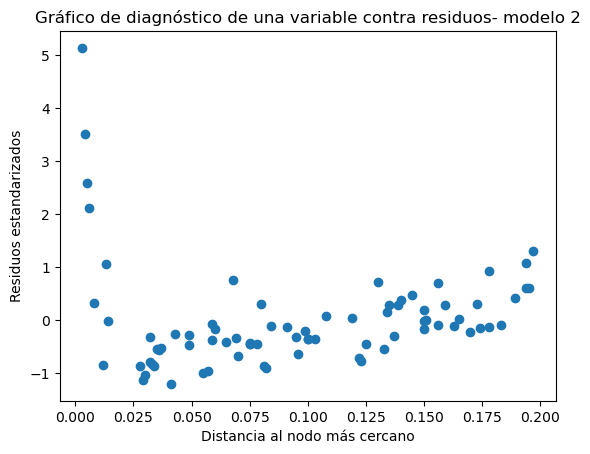

In [42]:
plt.scatter(regtecnica_train["distancianodo"],resultado2.resid_pearson)
plt.title("Gráfico de diagnóstico de una variable contra residuos- modelo 2")
plt.xlabel('Distancia al nodo más cercano')
plt.ylabel('Residuos estandarizados')
plt.show()

Se puede observar claramente que los residuales más altos corresponden a valores bajos de la distancia al nodo más cercano. ¿cómo explicarlo y usarlo?

Hasta ahora hemos hecho dos suposiciones tácitas: que las variables independientes presentes en la base de datos son las adecuadas para explicar la variable dependiente, y que la forma funcional de relación entre las variables independientes y dependiente estaba definida.

La primera suposición se enfrenta a lo que los modelos estadísticos clasicos mencionan: la escogencia de las variables que están en la base de datos no es neutra frente al modelo, y lo ideal es tener pistas o certidumbres de que, en el dominio del problema, las variables son relevantes.

La segunda suposición implica que consideramos que la relación de las variables independientes con la dependiente es lineal. La gráfica que hicimos sugiere que la relación con la distancia al nodo no es lineal, por lo menos para todos los posibles valores de distancia, y particularmente en los más bajos.

*feature enginnering* es la transformación y/o identificación de variables relevantes que pueden ser útiles para el modelo. Implica derivar variables desde las variables originales o conseguir nuevas variables. Generalmente requiere tener dominio del conocimiento o una aproximación teórica al fenómeno, porque de otro modo la búsqueda es ciega y las posibles transformaciones infinitas.

En nuestro caso, un dominio de conocimiento físico implica que la relación entre la potencia de una señal entre dos elementos y su distancia es inversa o cuadrática inversa. Vamos a crear esas dos variables, en ambas bases:

In [43]:
#entrenamiento
regtecnica_train["inverso"]=1/regtecnica_train["distancianodo"]
regtecnica_train["inverso2"]=1/regtecnica_train["distancianodo"]**2

#test
regtecnica_test["inverso"]=1/regtecnica_test["distancianodo"]
regtecnica_test["inverso2"]=1/regtecnica_test["distancianodo"]**2

#regtecnica.test$inverso=(1/regtecnica.test$distancianodo)
#regtecnica.test$inverso2=(1/regtecnica.test$distancianodo^2)

Y posteriormente, vamos a pedirle al método de pasos sucesivos que nos indique si vale la pena incluirlas:

In [44]:
resultado3=forward_selected(regtecnica_train,"potenciaresp")
print(resultado3.summary())

                            OLS Regression Results                            
Dep. Variable:           potenciaresp   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     826.3
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           9.49e-63
Time:                        18:00:31   Log-Likelihood:                -357.70
No. Observations:                  79   AIC:                             727.4
Df Residuals:                      73   BIC:                             741.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      255.3754      8.201     31.141   

Observe lo sorprendente de estos resultados: no solo el inverso es seleccionado,sino que su presencia hace que otras variables que habían sido descartadas (trafico y densidad) entran a hacer parte de un modelo cuyo r^2^ ajustado sube a 98.1% y error estándar de residuos baja sustancialmente:

In [45]:
print("Errores residuales: modelo3:",math.sqrt(resultado3.mse_resid))

Errores residuales: modelo3: 23.29817298590155


Este ejemplo muestra claramente como variables con la relación correcta obtenida desde el dominio del conocimiento pueden mejorar sustancialmente el aprendizaje de máquina.

Veamos ahora los supuestos. Nótese que la prueba de Jarque-Bera nos habla ahora de una posible normalidad de los residuos.

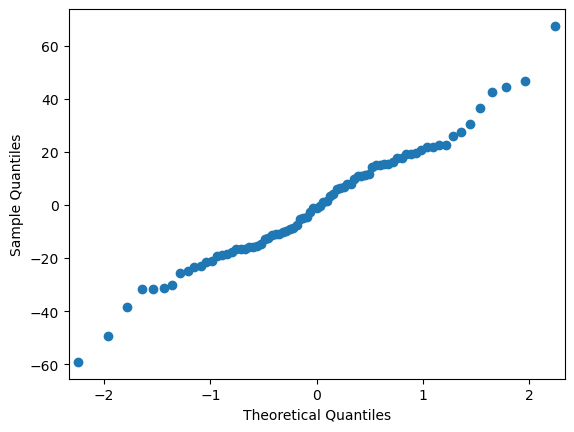

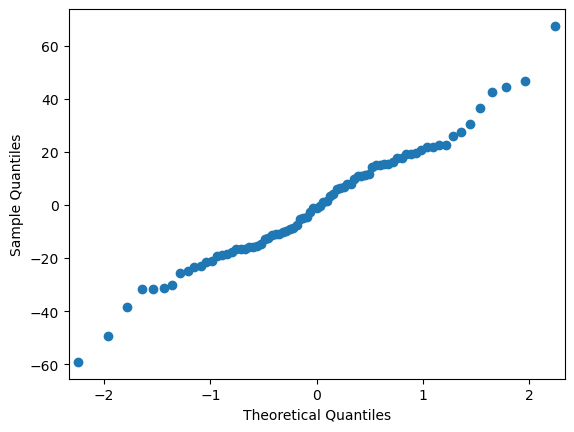

In [46]:
sm.qqplot(resultado3.resid)

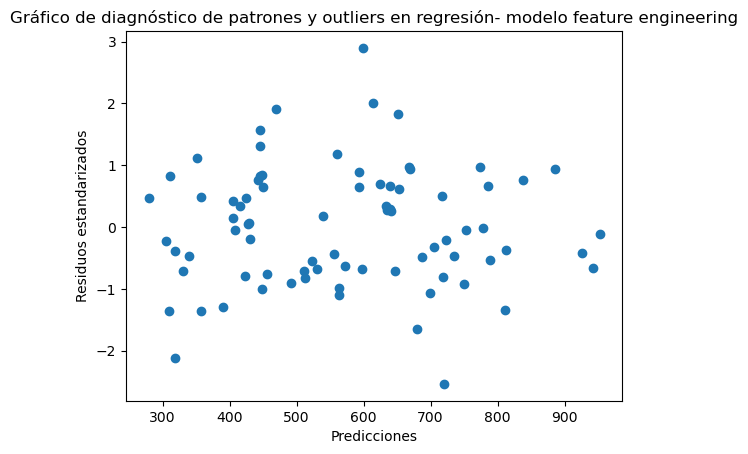

In [47]:
plt.scatter(resultado3.fittedvalues,resultado3.resid_pearson)
plt.title("Gráfico de diagnóstico de patrones y outliers en regresión- modelo feature engineering")
plt.xlabel('Predicciones')
plt.ylabel('Residuos estandarizados')
plt.show()

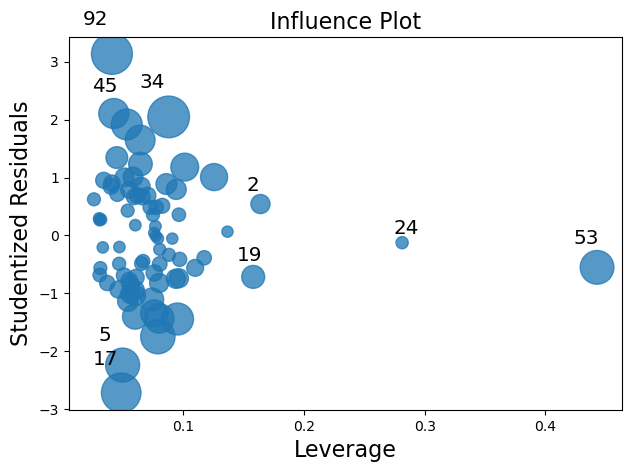

In [48]:
fig2 = sm.graphics.influence_plot(resultado3, criterion="cooks", size=30)
fig2.tight_layout(pad=1.0)

Los problemas de atípicos están bastante disminuidos, y no superan en tanto las 2 o 3 desviaciones estándar. Es un modelo que pasa los supuestos de un modelo de regresión, aunque aún hay algunos casos que podrían explorarse basados en el diagrama de influencia, que ahora muestra muchos puntos influyentes (probablemente por el bajo tamaño de muestra). Los resultados nos sugieren algun grado de multicolinealidad entre variables, lo cual sería importante más desde un punto de vista estadístico que desde un punto de vista de machine learning.

Finalmente, las predicciones:

In [49]:
predicciones3=resultado3.predict(regtecnica_test)
rmse3 = np.sqrt(mean_squared_error(potencia_test, predicciones3))
print(rmse0, rmse1, rmse2, rmse3)

47.34383261995048 48.64334049117005 42.72294080105618 27.898773499695952


En resumen, la creación de modelos con machine learning implica una fina sintonización de las variables disponibles, evitando el sobreajuste y realizando tanto selección de variables como ingeniería de variables (*feature engineering*)

##Regresión con scikit learn

Finalmente, como complemento a lo descrito, veamos como hacer regresión con una librería 100% orientada a modelos de machine learning como es scikit learn

In [50]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit (predictores_train, potencia_train)



#predictores_train, predictores_test, potencia_train, potencia_test

LinearRegression()

In [51]:
modelo.score(predictores_train, potencia_train)

0.8831079766656759

In [52]:
print('coeficiente de determinación:', modelo.score(predictores_train, potencia_train))
print('intercepto:', modelo.intercept_)
print('intercepto:', modelo.coef_)

coeficiente de determinación: 0.8831079766656759
intercepto: 354.9333240190982
intercepto: [-7.10755562e+02  1.06628636e+02 -1.04869016e-03  2.01834097e-02
  5.81983488e+01 -2.41244255e+00]


Nótense varias diferencias:
1- El modelo siempre se hace con todas las variables
2- Los resultados que el modelo entrega son mucho menos que con statmodels. Claro, si se quiere usar una métrica especifica para valorar el modelo, scikitlearn puede otorgar esa métrica.
Ahora, obtengamos predicciones:

In [53]:
prediccionessc=modelo.predict(predictores_test)

rmsesc = np.sqrt(mean_squared_error(prediccionessc, potencia_test))
print(rmsesc)

48.643340491162284
